<h1>SUBSET SELECTION</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns
import xlrd
import time
import statsmodels.api as sm

In [2]:
data=pd.read_excel('Data/Mini Project EFSA.xlsx')
data.rename(columns={'sex \n(0=M, 1=F)':'sex'}, inplace=True)
data

,response,number of animals,SD,dose,sex,endpoint
0,570.4,9,75.6,0,0,1
1,548.5,10,44.3,30,0,1
2,533.0,10,72.3,100,0,1
3,488.1,9,42.5,150,0,1
4,329.8,10,46.8,0,1,1
5,319.7,10,24.3,30,1,1
6,293.3,10,20.1,100,1,1
7,312.4,10,43.1,150,1,1
8,45.2,9,1.5,0,0,2
9,44.6,10,1.7,30,0,2


In [3]:
from funzioni import forward 

<h2>I dati sono le colonne originali</h2>

In [4]:
#Prepare the datas
y = data.response
weights = data.SD
X = data.drop(columns=["response","SD"])

#Devo estrarre l'endpoint dalla matrice in modo da avere 2 variabili categoriche usate per fare i 3 endpoint
endpoint1 = X['endpoint'] == 1
endpoint2 = X['endpoint'] == 2
X["endpoint1"] = endpoint1.astype("int")
X["endpoint2"] = endpoint2.astype("int")
X = X.drop(columns=["endpoint"])
X["ones"] = np.ones((X.shape[0],1))

In [6]:
 X

,number of animals,dose,sex,endpoint1,endpoint2,ones
0,9,0,0,1,0,1.0
1,10,30,0,1,0,1.0
2,10,100,0,1,0,1.0
3,9,150,0,1,0,1.0
4,10,0,1,1,0,1.0
5,10,30,1,1,0,1.0
6,10,100,1,1,0,1.0
7,10,150,1,1,0,1.0
8,9,0,0,0,1,1.0
9,10,30,0,0,1,1.0


<h1>2 - Use subset selection to estimate separate models for the 3 endpoints using gender as categorical variable.</h1>

<h1>3 - Use subset selection to estimate a unique model using gender and endpoint as categorical variables</h1>
<h2>Forward solo con i predittori lineari</h2>

In [8]:
models_fwd = pd.DataFrame(columns=["RSS", "model","number_of_predictors"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):
    models_fwd.loc[i] = forward(y,X,predictors,weights)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,9.399471e+05,1
1,<statsmodels.regression.linear_model.Regressio...,1.217807e+06,1
2,<statsmodels.regression.linear_model.Regressio...,1.373098e+06,1
3,<statsmodels.regression.linear_model.Regressio...,1.199003e+05,1
4,<statsmodels.regression.linear_model.Regressio...,1.545685e+06,1
5,<statsmodels.regression.linear_model.Regressio...,9.317769e+05,1


Processed  6 models on 1 predictors in 0.040886878967285156 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,106205.547948,2
1,<statsmodels.regression.linear_model.Regressio...,116170.552878,2
2,<statsmodels.regression.linear_model.Regressio...,116031.181000,2
3,<statsmodels.regression.linear_model.Regressio...,104762.270000,2
4,<statsmodels.regression.linear_model.Regressio...,104875.639375,2


Processed  5 models on 2 predictors in 0.03490710258483887 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,102949.227791,3
1,<statsmodels.regression.linear_model.Regressio...,104762.060164,3
2,<statsmodels.regression.linear_model.Regressio...,87584.958750,3
3,<statsmodels.regression.linear_model.Regressio...,102231.108750,3


Processed  4 models on 3 predictors in 0.04887080192565918 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,69662.837509,4
1,<statsmodels.regression.linear_model.Regressio...,86047.391101,4
2,<statsmodels.regression.linear_model.Regressio...,69692.538333,4


Processed  3 models on 4 predictors in 0.03191423416137695 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,68561.346108,5
1,<statsmodels.regression.linear_model.Regressio...,69650.725000,5


Processed  2 models on 5 predictors in 0.018955707550048828 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,68512.825352,6


Processed  1 models on 6 predictors in 0.016954898834228516 seconds.
Total elapsed time: 0.24832987785339355 seconds.


In [9]:
display(models_fwd)

,RSS,model,number_of_predictors
1,119900.270000,<statsmodels.regression.linear_model.Regressio...,1
2,104762.270000,<statsmodels.regression.linear_model.Regressio...,2
3,87584.958750,<statsmodels.regression.linear_model.Regressio...,3
4,69662.837509,<statsmodels.regression.linear_model.Regressio...,4
5,68561.346108,<statsmodels.regression.linear_model.Regressio...,5
6,68512.825352,<statsmodels.regression.linear_model.Regressio...,6


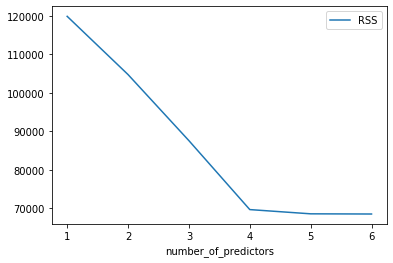

In [10]:
models_fwd.plot(x='number_of_predictors', y='RSS')

In [11]:
 for i in range(0,models_fwd.shape[0]):
    print(models_fwd.iloc[i]["model"].model.exog_names)
    print()


['endpoint1']

['endpoint1', 'endpoint2']

['endpoint1', 'endpoint2', 'sex']

['endpoint1', 'endpoint2', 'sex', 'number of animals']

['endpoint1', 'endpoint2', 'sex', 'number of animals', 'dose']

['endpoint1', 'endpoint2', 'sex', 'number of animals', 'dose', 'ones']



In [77]:
res = models_fwd.iloc[5]["model"].model.fit()

In [7]: print(res.summary())

                            WLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.926
Model:                            WLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     45.36
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           1.40e-09
Time:                        17:08:09   Log-Likelihood:                -129.54
No. Observations:                  24   AIC:                             271.1
Df Residuals:                      18   BIC:                             278.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
endpoint1           406.6125     30.84

<h2>Confrontiamo ora questi modelli con criteri oggettivi</h2>

In [87]:
for i in range(1, models_fwd.shape[0]):
    model = models_fwd.loc[i,"model"]
    models_fwd.loc[i,"aic"] = model.aic
    models_fwd.loc[i,"bic"] = model.bic
    models_fwd.loc[i,"mse"] = model.mse_total
    models_fwd.loc[i,"adj_rsquare"] = model.rsquared_adj
    

In [88]:
models_fwd

,RSS,model,number_of_predictors,aic,bic,mse,adj-rsquare,adj_rsquare
1,119900.270000,<statsmodels.regression.linear_model.Regressio...,1,274.501732,275.679786,65034.297917,0.919841,0.919841
2,104762.270000,<statsmodels.regression.linear_model.Regressio...,2,273.262533,275.618641,65034.297917,0.926778,0.926778
3,87584.958750,<statsmodels.regression.linear_model.Regressio...,3,270.964507,274.498669,65034.297917,0.935869,0.935869
4,69662.837509,<statsmodels.regression.linear_model.Regressio...,4,267.469892,272.182108,65034.297917,0.946441,0.946441
5,68561.346108,<statsmodels.regression.linear_model.Regressio...,5,269.087378,274.977647,65034.297917,0.944514,0.944514
6,68512.825352,<statsmodels.regression.linear_model.Regressio...,6,NaN,NaN,NaN,NaN,NaN


In [90]:
#Quelli da minimizzare
for criteria in ["bic","aic"]:
    print("The criteria is: " + criteria)
    row = models_fwd.loc[models_fwd[criteria].argmin()]
    modelFeatures = row["model"].model.exog_names
    if "intercept" not in modelFeatures:
        modelFeatures.append("intercept")
    criteriaValue = row[criteria]
    degressOfFreedom = row["model"].model.df_model
    print("Features: "+str(modelFeatures))
    print("Criteria value: "+str(criteriaValue))
    print("Degrees of freedom: "+str(degressOfFreedom+1))
    print()
    
    
#Quelli da massimizzare
for criteria in ["adj_rsquare"]:
    print("The criteria is: " + criteria)
    row = models_fwd.loc[models_fwd[criteria].argmax()]
    modelFeatures = row["model"].model.exog_names
    if "intercept" not in modelFeatures:
        modelFeatures.append("intercept")
    criteriaValue = row[criteria]
    degressOfFreedom = row["model"].model.df_model
    print("Features: "+str(modelFeatures))
    print("Criteria value: "+str(criteriaValue))
    print("Degrees of freedom: "+str(degressOfFreedom+1))
    print()

    

The criteria is: bic
Features: ['endpoint1', 'endpoint2', 'sex', 'intercept']
Criteria value: 274.49866855846733
Degrees of freedom: 4.0

The criteria is: aic
Features: ['endpoint1', 'endpoint2', 'sex', 'intercept']
Criteria value: 270.9645070674235
Degrees of freedom: 4.0

The criteria is: adj_rsquare
Features: ['endpoint1', 'endpoint2', 'sex', 'intercept']
Criteria value: 0.9358690344166886
Degrees of freedom: 4.0



In [15]:
from funzioni import CarloCrecco 
CarloCrecco()

Cuina!
